In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score 





# Data preprocessing

### 1.demographics 

In [2]:
train_demographics = pd.read_csv("./data/traindemographics.csv")
train_demographics

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN
...,...,...,...,...,...,...,...,...,...
4341,8a858f155554552501555588ca2b3b40,1985-12-13 00:00:00.000000,Other,3.236753,7.030168,Stanbic IBTC,NaN,Permanent,Graduate
4342,8a858fc65cf978f4015cf97cee3a02ce,1982-07-01 00:00:00.000000,Savings,7.013750,4.875662,GT Bank,NaN,NaN,NaN
4343,8a858f4f5b66de3a015b66fc83c61902,1989-09-26 00:00:00.000000,Savings,6.295530,7.092508,GT Bank,NaN,Permanent,NaN
4344,8aaae7a74400b28201441c8b62514150,1985-09-06 00:00:00.000000,Savings,3.354206,6.539070,GT Bank,HEAD OFFICE,Permanent,Primary


In [3]:
train_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4346 non-null   object 
 1   birthdate                   4346 non-null   object 
 2   bank_account_type           4346 non-null   object 
 3   longitude_gps               4346 non-null   float64
 4   latitude_gps                4346 non-null   float64
 5   bank_name_clients           4346 non-null   object 
 6   bank_branch_clients         51 non-null     object 
 7   employment_status_clients   3698 non-null   object 
 8   level_of_education_clients  587 non-null    object 
dtypes: float64(2), object(7)
memory usage: 305.7+ KB


### 2.trainperf

In [4]:
train_perf = pd.read_csv("./data/trainperf.csv")
train_perf

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good
...,...,...,...,...,...,...,...,...,...,...
4363,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30 09:19:42.000000,2017-07-30 08:18:30.000000,10000.0,13000.0,30,NaN,Bad
4364,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27 15:35:47.000000,2017-07-27 14:35:40.000000,10000.0,13000.0,30,NaN,Bad
4365,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25 16:25:57.000000,2017-07-25 15:24:47.000000,10000.0,11500.0,15,NaN,Bad
4366,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14 13:50:27.000000,2017-07-14 12:50:21.000000,10000.0,13000.0,30,8a858eda5c8863ff015c9dead65807bb,Bad


In [5]:
train_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   int64  
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   referredby     587 non-null    object 
 9   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 341.4+ KB


### 3.trainprevloans

In [6]:
train_prevloans = pd.read_csv("./data/trainprevloans.csv")
train_prevloans

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
18178,8a858899538ddb8e0153a2b555421fc5,301611754,2,2016-04-16 13:36:34.000000,2016-04-16 12:36:28.000000,10000.0,13000.0,30,2016-05-14 00:04:52.000000,NaN,2016-05-16 00:00:00.000000,2016-05-13 18:05:07.000000
18179,8a858899538ddb8e0153a2b555421fc5,301761267,9,2016-11-18 14:26:07.000000,2016-11-18 13:25:51.000000,30000.0,34400.0,30,2016-12-13 16:08:57.000000,NaN,2016-12-19 00:00:00.000000,2016-12-13 15:53:48.000000
18180,8a858899538ddb8e0153a2b555421fc5,301631653,4,2016-06-12 15:30:56.000000,2016-06-12 14:30:50.000000,10000.0,13000.0,30,2016-07-09 15:39:00.000000,NaN,2016-07-12 00:00:00.000000,2016-07-09 15:23:56.000000
18181,8a858f0656b7820c0156c92ca3ba436f,301697691,1,2016-08-27 20:03:45.000000,2016-08-27 19:03:34.000000,10000.0,13000.0,30,2016-10-15 10:17:54.000000,NaN,2016-09-26 00:00:00.000000,2016-10-15 10:02:45.000000


In [7]:
train_prevloans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       18183 non-null  object 
 1   systemloanid     18183 non-null  int64  
 2   loannumber       18183 non-null  int64  
 3   approveddate     18183 non-null  object 
 4   creationdate     18183 non-null  object 
 5   loanamount       18183 non-null  float64
 6   totaldue         18183 non-null  float64
 7   termdays         18183 non-null  int64  
 8   closeddate       18183 non-null  object 
 9   referredby       1026 non-null   object 
 10  firstduedate     18183 non-null  object 
 11  firstrepaiddate  18183 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB


### merge train_demographics in train_perf data

In [8]:
train_data = pd.merge(train_perf, train_demographics, on="customerid", how="left")
train_data

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good,1985-08-23 00:00:00.000000,Savings,3.885298,7.320700,GT Bank,"DUGBE,IBADAN",Permanent,Graduate
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good,1984-09-18 00:00:00.000000,Other,11.139350,10.292041,EcoBank,NaN,Permanent,NaN
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good,1977-10-10 00:00:00.000000,Savings,3.985770,7.491708,First Bank,NaN,Permanent,NaN
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good,1986-09-07 00:00:00.000000,Other,7.457913,9.076574,GT Bank,NaN,Permanent,Primary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4371,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30 09:19:42.000000,2017-07-30 08:18:30.000000,10000.0,13000.0,30,NaN,Bad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4372,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27 15:35:47.000000,2017-07-27 14:35:40.000000,10000.0,13000.0,30,NaN,Bad,1989-12-04 00:00:00.000000,Savings,4.607358,8.460608,FCMB,NaN,Permanent,NaN
4373,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25 16:25:57.000000,2017-07-25 15:24:47.000000,10000.0,11500.0,15,NaN,Bad,1989-11-21 00:00:00.000000,Savings,3.976842,7.409129,First Bank,NaN,Permanent,NaN
4374,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14 13:50:27.000000,2017-07-14 12:50:21.000000,10000.0,13000.0,30,8a858eda5c8863ff015c9dead65807bb,Bad,1990-06-11 00:00:00.000000,Savings,3.986089,7.386796,Skye Bank,NaN,Permanent,NaN


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4376 entries, 0 to 4375
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4376 non-null   object 
 1   systemloanid                4376 non-null   int64  
 2   loannumber                  4376 non-null   int64  
 3   approveddate                4376 non-null   object 
 4   creationdate                4376 non-null   object 
 5   loanamount                  4376 non-null   float64
 6   totaldue                    4376 non-null   float64
 7   termdays                    4376 non-null   int64  
 8   referredby                  589 non-null    object 
 9   good_bad_flag               4376 non-null   object 
 10  birthdate                   3277 non-null   object 
 11  bank_account_type           3277 non-null   object 
 12  longitude_gps               3277 non-null   float64
 13  latitude_gps                3277 

### A stastistical summary of the numerical attributes

In [10]:
train_data.describe()

,systemloanid,loannumber,loanamount,totaldue,termdays,longitude_gps,latitude_gps
count,4.376000e+03,4376.000000,4376.000000,4376.000000,4376.000000,3277.000000,3277.000000
mean,3.019810e+08,5.169333,17803.930530,21252.565288,29.266453,4.534611,7.292799
std,1.342393e+04,3.652679,10749.041391,11943.706857,11.513424,7.916626,3.268758
min,3.019585e+08,2.000000,10000.000000,10000.000000,15.000000,-118.247009,-33.868818
25%,3.019691e+08,2.000000,10000.000000,13000.000000,30.000000,3.354984,6.473645
50%,3.019801e+08,4.000000,10000.000000,13000.000000,30.000000,3.587546,6.625954
75%,3.019935e+08,7.000000,20000.000000,24500.000000,30.000000,6.478157,7.429882
max,3.020040e+08,27.000000,60000.000000,68100.000000,90.000000,151.209290,71.228069


### valeurs manquantes

In [11]:
def missing_value_rate(data):
    return 100 * data.isna().sum() / data.shape[0]

In [12]:
missing_value_rate(train_data)

customerid                     0.000000
systemloanid                   0.000000
loannumber                     0.000000
approveddate                   0.000000
creationdate                   0.000000
loanamount                     0.000000
totaldue                       0.000000
termdays                       0.000000
referredby                    86.540219
good_bad_flag                  0.000000
birthdate                     25.114260
bank_account_type             25.114260
longitude_gps                 25.114260
latitude_gps                  25.114260
bank_name_clients             25.114260
bank_branch_clients           99.245887
employment_status_clients     36.380256
level_of_education_clients    89.876600
dtype: float64

In [13]:
train_data.isnull().sum() 

customerid                       0
systemloanid                     0
loannumber                       0
approveddate                     0
creationdate                     0
loanamount                       0
totaldue                         0
termdays                         0
referredby                    3787
good_bad_flag                    0
birthdate                     1099
bank_account_type             1099
longitude_gps                 1099
latitude_gps                  1099
bank_name_clients             1099
bank_branch_clients           4343
employment_status_clients     1592
level_of_education_clients    3933
dtype: int64

##### remplacer les dates en datetime

In [14]:
train_data['approveddate'] = pd.to_datetime(train_data['approveddate'])
train_data['creationdate'] = pd.to_datetime(train_data['creationdate'])
train_data['birthdate'] = pd.to_datetime(train_data['birthdate']) 

##### recupérer l'age de chaque client

In [15]:
approved_year = 2017
train_data["birthdate"] = approved_year - train_data["birthdate"].dt.year

###### rénomer la colonne birthdate to age

In [16]:
train_data.rename(columns = {'birthdate' : 'age'}, inplace=True)

In [17]:
train_data

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,age,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,Good,45.0,Other,3.432010,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,Good,32.0,Savings,3.885298,7.320700,GT Bank,"DUGBE,IBADAN",Permanent,Graduate
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,Good,33.0,Other,11.139350,10.292041,EcoBank,NaN,Permanent,NaN
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,Good,40.0,Savings,3.985770,7.491708,First Bank,NaN,Permanent,NaN
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,Good,31.0,Other,7.457913,9.076574,GT Bank,NaN,Permanent,Primary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4371,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30 09:19:42,2017-07-30 08:18:30,10000.0,13000.0,30,NaN,Bad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4372,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27 15:35:47,2017-07-27 14:35:40,10000.0,13000.0,30,NaN,Bad,28.0,Savings,4.607358,8.460608,FCMB,NaN,Permanent,NaN
4373,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25 16:25:57,2017-07-25 15:24:47,10000.0,11500.0,15,NaN,Bad,28.0,Savings,3.976842,7.409129,First Bank,NaN,Permanent,NaN
4374,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14 13:50:27,2017-07-14 12:50:21,10000.0,13000.0,30,8a858eda5c8863ff015c9dead65807bb,Bad,27.0,Savings,3.986089,7.386796,Skye Bank,NaN,Permanent,NaN


##### remplacer les valeurs age manquante par la moyenne d'age des clients

In [18]:
train_data['age'].fillna(train_data['age'].mean(), inplace=True)

In [19]:
train_data

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,age,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,Good,45.000000,Other,3.432010,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,Good,32.000000,Savings,3.885298,7.320700,GT Bank,"DUGBE,IBADAN",Permanent,Graduate
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,Good,33.000000,Other,11.139350,10.292041,EcoBank,NaN,Permanent,NaN
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,Good,40.000000,Savings,3.985770,7.491708,First Bank,NaN,Permanent,NaN
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,Good,31.000000,Other,7.457913,9.076574,GT Bank,NaN,Permanent,Primary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4371,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30 09:19:42,2017-07-30 08:18:30,10000.0,13000.0,30,NaN,Bad,32.916692,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4372,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27 15:35:47,2017-07-27 14:35:40,10000.0,13000.0,30,NaN,Bad,28.000000,Savings,4.607358,8.460608,FCMB,NaN,Permanent,NaN
4373,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25 16:25:57,2017-07-25 15:24:47,10000.0,11500.0,15,NaN,Bad,28.000000,Savings,3.976842,7.409129,First Bank,NaN,Permanent,NaN
4374,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14 13:50:27,2017-07-14 12:50:21,10000.0,13000.0,30,8a858eda5c8863ff015c9dead65807bb,Bad,27.000000,Savings,3.986089,7.386796,Skye Bank,NaN,Permanent,NaN


##### voir les proportions de employment_status_clients

In [20]:
train_data['employment_status_clients'].value_counts()

Permanent        2348
Self-Employed     277
Student           111
Unemployed         43
Retired             4
Contract            1
Name: employment_status_clients, dtype: int64

##### remplacer les valeurs de employment_status_clients par Unemployed

In [21]:
train_data["employment_status_clients"].fillna(value="Unemployed", inplace=True)

In [22]:
train_data

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,age,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,Good,45.000000,Other,3.432010,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,Good,32.000000,Savings,3.885298,7.320700,GT Bank,"DUGBE,IBADAN",Permanent,Graduate
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,Good,33.000000,Other,11.139350,10.292041,EcoBank,NaN,Permanent,NaN
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,Good,40.000000,Savings,3.985770,7.491708,First Bank,NaN,Permanent,NaN
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,Good,31.000000,Other,7.457913,9.076574,GT Bank,NaN,Permanent,Primary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4371,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30 09:19:42,2017-07-30 08:18:30,10000.0,13000.0,30,NaN,Bad,32.916692,NaN,NaN,NaN,NaN,NaN,Unemployed,NaN
4372,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27 15:35:47,2017-07-27 14:35:40,10000.0,13000.0,30,NaN,Bad,28.000000,Savings,4.607358,8.460608,FCMB,NaN,Permanent,NaN
4373,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25 16:25:57,2017-07-25 15:24:47,10000.0,11500.0,15,NaN,Bad,28.000000,Savings,3.976842,7.409129,First Bank,NaN,Permanent,NaN
4374,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14 13:50:27,2017-07-14 12:50:21,10000.0,13000.0,30,8a858eda5c8863ff015c9dead65807bb,Bad,27.000000,Savings,3.986089,7.386796,Skye Bank,NaN,Permanent,NaN


##### Niveau d'éducation des clients

In [23]:
train_data["level_of_education_clients"].value_counts()

Graduate         321
Secondary         65
Post-Graduate     50
Primary            7
Name: level_of_education_clients, dtype: int64

##### remplacer les valeurs NaN par Undefined pour level_of_education_clients

In [24]:
train_data["level_of_education_clients"].fillna(value="Undefined", inplace=True)
train_data

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,age,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,Good,45.000000,Other,3.432010,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,Good,32.000000,Savings,3.885298,7.320700,GT Bank,"DUGBE,IBADAN",Permanent,Graduate
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,Good,33.000000,Other,11.139350,10.292041,EcoBank,NaN,Permanent,Undefined
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,Good,40.000000,Savings,3.985770,7.491708,First Bank,NaN,Permanent,Undefined
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,Good,31.000000,Other,7.457913,9.076574,GT Bank,NaN,Permanent,Primary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4371,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30 09:19:42,2017-07-30 08:18:30,10000.0,13000.0,30,NaN,Bad,32.916692,NaN,NaN,NaN,NaN,NaN,Unemployed,Undefined
4372,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27 15:35:47,2017-07-27 14:35:40,10000.0,13000.0,30,NaN,Bad,28.000000,Savings,4.607358,8.460608,FCMB,NaN,Permanent,Undefined
4373,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25 16:25:57,2017-07-25 15:24:47,10000.0,11500.0,15,NaN,Bad,28.000000,Savings,3.976842,7.409129,First Bank,NaN,Permanent,Undefined
4374,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14 13:50:27,2017-07-14 12:50:21,10000.0,13000.0,30,8a858eda5c8863ff015c9dead65807bb,Bad,27.000000,Savings,3.986089,7.386796,Skye Bank,NaN,Permanent,Undefined


In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4376 entries, 0 to 4375
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  4376 non-null   object        
 1   systemloanid                4376 non-null   int64         
 2   loannumber                  4376 non-null   int64         
 3   approveddate                4376 non-null   datetime64[ns]
 4   creationdate                4376 non-null   datetime64[ns]
 5   loanamount                  4376 non-null   float64       
 6   totaldue                    4376 non-null   float64       
 7   termdays                    4376 non-null   int64         
 8   referredby                  589 non-null    object        
 9   good_bad_flag               4376 non-null   object        
 10  age                         4376 non-null   float64       
 11  bank_account_type           3277 non-null   object      

##### Effacer les colonnes que l'on n'utilisera pas

In [26]:
train_data.drop(['referredby', 'longitude_gps', 'latitude_gps', 'bank_name_clients', 'bank_branch_clients'], axis=1, inplace=True)

In [27]:
train_data

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,age,bank_account_type,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good,45.000000,Other,Permanent,Post-Graduate
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,Good,32.000000,Savings,Permanent,Graduate
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,Good,33.000000,Other,Permanent,Undefined
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,Good,40.000000,Savings,Permanent,Undefined
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,Good,31.000000,Other,Permanent,Primary
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4371,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30 09:19:42,2017-07-30 08:18:30,10000.0,13000.0,30,Bad,32.916692,NaN,Unemployed,Undefined
4372,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27 15:35:47,2017-07-27 14:35:40,10000.0,13000.0,30,Bad,28.000000,Savings,Permanent,Undefined
4373,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25 16:25:57,2017-07-25 15:24:47,10000.0,11500.0,15,Bad,28.000000,Savings,Permanent,Undefined
4374,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14 13:50:27,2017-07-14 12:50:21,10000.0,13000.0,30,Bad,27.000000,Savings,Permanent,Undefined


In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4376 entries, 0 to 4375
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  4376 non-null   object        
 1   systemloanid                4376 non-null   int64         
 2   loannumber                  4376 non-null   int64         
 3   approveddate                4376 non-null   datetime64[ns]
 4   creationdate                4376 non-null   datetime64[ns]
 5   loanamount                  4376 non-null   float64       
 6   totaldue                    4376 non-null   float64       
 7   termdays                    4376 non-null   int64         
 8   good_bad_flag               4376 non-null   object        
 9   age                         4376 non-null   float64       
 10  bank_account_type           3277 non-null   object        
 11  employment_status_clients   4376 non-null   object      

##### remplacer les valeurs du target good_bad_flag par 0 ou 1

In [29]:
labelencoder = LabelEncoder()
train_data['good_bad_flag'] = labelencoder.fit_transform(train_data['good_bad_flag'])
train_data

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,age,bank_account_type,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,1,45.000000,Other,Permanent,Post-Graduate
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,1,32.000000,Savings,Permanent,Graduate
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,1,33.000000,Other,Permanent,Undefined
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,1,40.000000,Savings,Permanent,Undefined
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,1,31.000000,Other,Permanent,Primary
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4371,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30 09:19:42,2017-07-30 08:18:30,10000.0,13000.0,30,0,32.916692,NaN,Unemployed,Undefined
4372,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27 15:35:47,2017-07-27 14:35:40,10000.0,13000.0,30,0,28.000000,Savings,Permanent,Undefined
4373,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25 16:25:57,2017-07-25 15:24:47,10000.0,11500.0,15,0,28.000000,Savings,Permanent,Undefined
4374,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14 13:50:27,2017-07-14 12:50:21,10000.0,13000.0,30,0,27.000000,Savings,Permanent,Undefined


##### visualiser la target variable

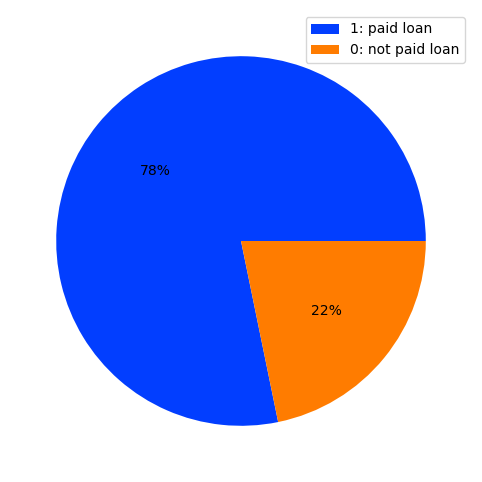

In [30]:
plt.figure(figsize=(10,6))
palette_color = sns.color_palette('bright')
plt.pie(train_data['good_bad_flag'].value_counts(),colors= palette_color, autopct='%.0f%%') 
plt.legend(["1: paid loan","0: not paid loan"]) 

## Visualisation des features

#### employement_status_clients

<AxesSubplot:xlabel='good_bad_flag', ylabel='count'>

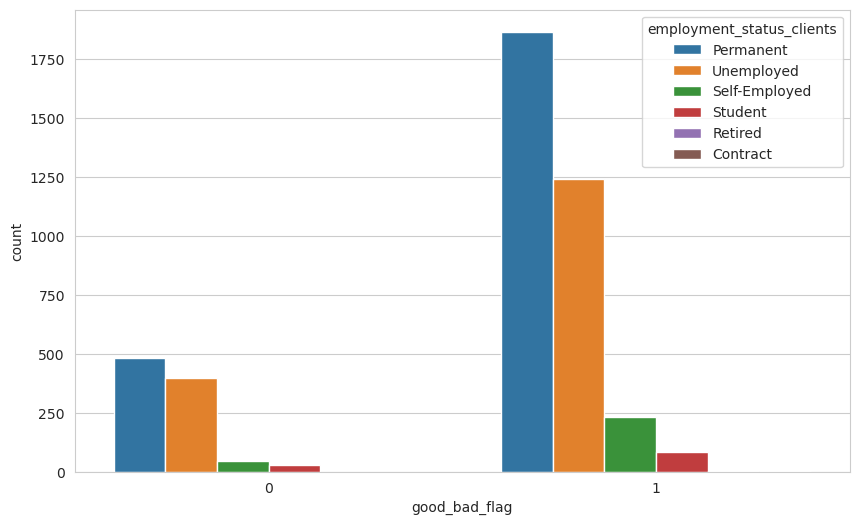

In [31]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(data=train_data, x= 'good_bad_flag', hue='employment_status_clients')

#### level_of_education

<AxesSubplot:xlabel='good_bad_flag', ylabel='count'>

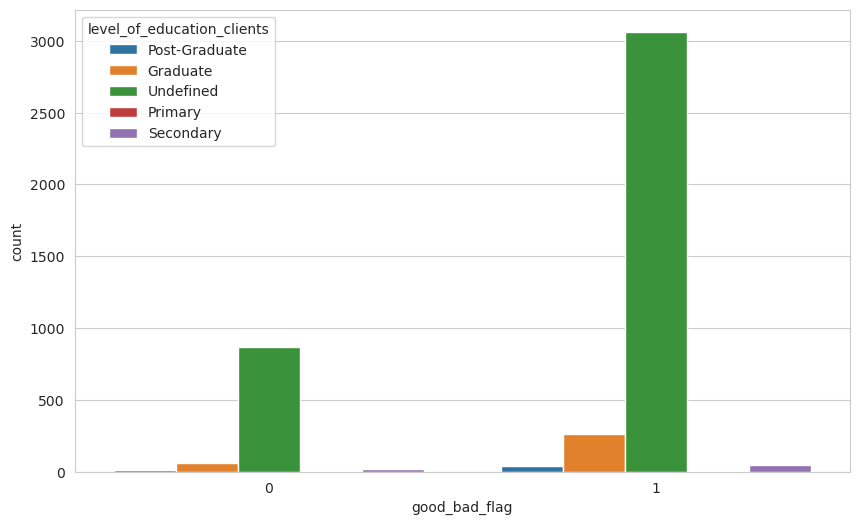

In [32]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(data=train_data, x= 'good_bad_flag', hue="level_of_education_clients")

##### age

<AxesSubplot:xlabel='good_bad_flag', ylabel='count'>

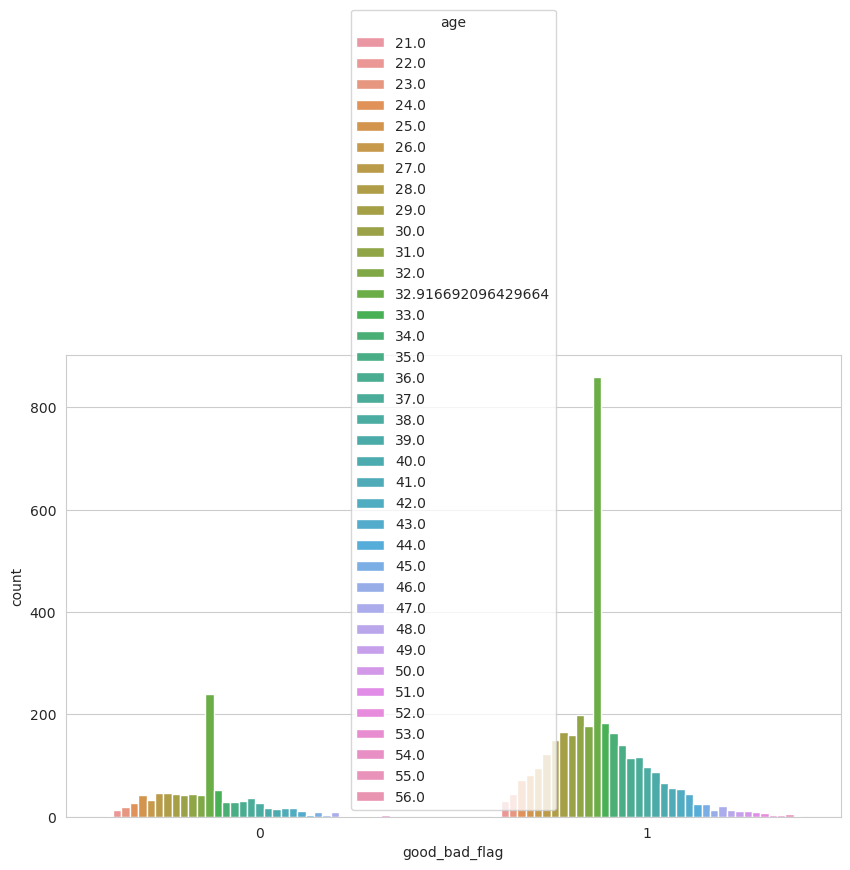

In [33]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(data=train_data, x= 'good_bad_flag', hue='age')

### termdays

<AxesSubplot:xlabel='good_bad_flag', ylabel='count'>

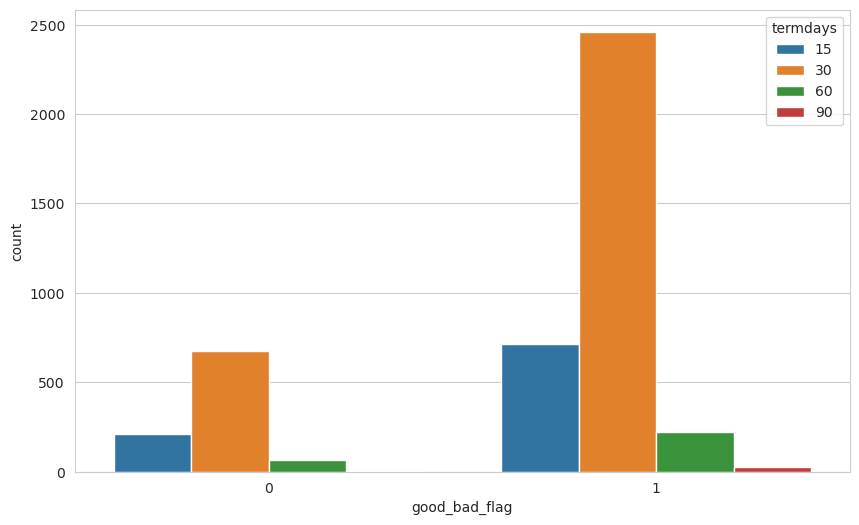

In [34]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(data=train_data, x= 'good_bad_flag', hue='termdays')

### Add loan interest features

In [35]:
def loan_interest(loanamount,totaldue):
    loan_interest = ((totaldue - loanamount)/loanamount) * 100
    return loan_interest 

In [36]:
train_data['loan_interest'] = train_data.apply(lambda x: loan_interest(x["loanamount"], x["totaldue"]),axis=1)
train_data

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,age,bank_account_type,employment_status_clients,level_of_education_clients,loan_interest
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,1,45.000000,Other,Permanent,Post-Graduate,15.00
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,1,32.000000,Savings,Permanent,Graduate,15.00
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,1,33.000000,Other,Permanent,Undefined,11.25
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,1,40.000000,Savings,Permanent,Undefined,15.00
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,1,31.000000,Other,Permanent,Primary,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4371,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30 09:19:42,2017-07-30 08:18:30,10000.0,13000.0,30,0,32.916692,NaN,Unemployed,Undefined,30.00
4372,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27 15:35:47,2017-07-27 14:35:40,10000.0,13000.0,30,0,28.000000,Savings,Permanent,Undefined,30.00
4373,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25 16:25:57,2017-07-25 15:24:47,10000.0,11500.0,15,0,28.000000,Savings,Permanent,Undefined,15.00
4374,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14 13:50:27,2017-07-14 12:50:21,10000.0,13000.0,30,0,27.000000,Savings,Permanent,Undefined,30.00


## utiliser train_prevloans
grouper les informations de train_prevloans de chaque clients pour determiner loan_received, amount_received, min_amount_received, max_amount_received


In [37]:
train_data_prev_loans = train_prevloans.groupby('customerid')['loanamount'].agg(['count','sum','min', 'max'])
train_data_prev_loans

,count,sum,min,max
customerid,,,,
8a1088a0484472eb01484669e3ce4e0b,1,10000.0,10000.0,10000.0
8a1a1e7e4f707f8b014f797718316cad,4,70000.0,10000.0,30000.0
8a1a32fc49b632520149c3b8fdf85139,7,90000.0,10000.0,20000.0
8a1eb5ba49a682300149c3c068b806c7,8,130000.0,10000.0,30000.0
8a1edbf14734127f0147356fdb1b1eb2,2,20000.0,10000.0,10000.0
...,...,...,...,...
8a858fff5a28d297015a33bc2e845305,6,100000.0,10000.0,30000.0
8a858fff5a36fe68015a37f8550a02a2,6,90000.0,10000.0,20000.0
8a858fff5a36fe68015a3ac5851618ab,1,10000.0,10000.0,10000.0


In [38]:
train_data_prev_loans.rename(columns = {'count':'loan_received'}, inplace=True)
train_data_prev_loans.rename(columns = {'sum':'amount_received'}, inplace=True)
train_data_prev_loans.rename(columns = {'min':'min_amount_received'}, inplace=True)
train_data_prev_loans.rename(columns = {'max':'max_amount_received'}, inplace=True)
train_data_prev_loans

,loan_received,amount_received,min_amount_received,max_amount_received
customerid,,,,
8a1088a0484472eb01484669e3ce4e0b,1,10000.0,10000.0,10000.0
8a1a1e7e4f707f8b014f797718316cad,4,70000.0,10000.0,30000.0
8a1a32fc49b632520149c3b8fdf85139,7,90000.0,10000.0,20000.0
8a1eb5ba49a682300149c3c068b806c7,8,130000.0,10000.0,30000.0
8a1edbf14734127f0147356fdb1b1eb2,2,20000.0,10000.0,10000.0
...,...,...,...,...
8a858fff5a28d297015a33bc2e845305,6,100000.0,10000.0,30000.0
8a858fff5a36fe68015a37f8550a02a2,6,90000.0,10000.0,20000.0
8a858fff5a36fe68015a3ac5851618ab,1,10000.0,10000.0,10000.0


In [39]:
train_data_prev_loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4359 entries, 8a1088a0484472eb01484669e3ce4e0b to 8a858fff5c79144c015c7bdbfc086ce1
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_received        4359 non-null   int64  
 1   amount_received      4359 non-null   float64
 2   min_amount_received  4359 non-null   float64
 3   max_amount_received  4359 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 170.3+ KB


### merger train_data_prev_loans dans train_data

In [40]:
train_data = train_data.merge(right=train_data_prev_loans , on='customerid', how='left')
train_data

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,age,bank_account_type,employment_status_clients,level_of_education_clients,loan_interest,loan_received,amount_received,min_amount_received,max_amount_received
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,1,45.000000,Other,Permanent,Post-Graduate,15.00,11.0,200000.0,10000.0,30000.0
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,1,32.000000,Savings,Permanent,Graduate,15.00,NaN,NaN,NaN,NaN
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,1,33.000000,Other,Permanent,Undefined,11.25,6.0,60000.0,10000.0,10000.0
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,1,40.000000,Savings,Permanent,Undefined,15.00,2.0,20000.0,10000.0,10000.0
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,1,31.000000,Other,Permanent,Primary,10.00,8.0,150000.0,10000.0,30000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4371,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30 09:19:42,2017-07-30 08:18:30,10000.0,13000.0,30,0,32.916692,NaN,Unemployed,Undefined,30.00,1.0,10000.0,10000.0,10000.0
4372,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27 15:35:47,2017-07-27 14:35:40,10000.0,13000.0,30,0,28.000000,Savings,Permanent,Undefined,30.00,1.0,10000.0,10000.0,10000.0
4373,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25 16:25:57,2017-07-25 15:24:47,10000.0,11500.0,15,0,28.000000,Savings,Permanent,Undefined,15.00,2.0,20000.0,10000.0,10000.0
4374,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14 13:50:27,2017-07-14 12:50:21,10000.0,13000.0,30,0,27.000000,Savings,Permanent,Undefined,30.00,1.0,10000.0,10000.0,10000.0


remplacer les valeurs null par 0

In [41]:
train_data['loan_received'].fillna(0, inplace =True)
train_data['amount_received'].fillna(0, inplace =True)
train_data['min_amount_received'].fillna(0, inplace =True)
train_data['max_amount_received'].fillna(0, inplace =True) 
train_data

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,age,bank_account_type,employment_status_clients,level_of_education_clients,loan_interest,loan_received,amount_received,min_amount_received,max_amount_received
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,1,45.000000,Other,Permanent,Post-Graduate,15.00,11.0,200000.0,10000.0,30000.0
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,1,32.000000,Savings,Permanent,Graduate,15.00,0.0,0.0,0.0,0.0
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,1,33.000000,Other,Permanent,Undefined,11.25,6.0,60000.0,10000.0,10000.0
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,1,40.000000,Savings,Permanent,Undefined,15.00,2.0,20000.0,10000.0,10000.0
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,1,31.000000,Other,Permanent,Primary,10.00,8.0,150000.0,10000.0,30000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4371,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30 09:19:42,2017-07-30 08:18:30,10000.0,13000.0,30,0,32.916692,NaN,Unemployed,Undefined,30.00,1.0,10000.0,10000.0,10000.0
4372,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27 15:35:47,2017-07-27 14:35:40,10000.0,13000.0,30,0,28.000000,Savings,Permanent,Undefined,30.00,1.0,10000.0,10000.0,10000.0
4373,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25 16:25:57,2017-07-25 15:24:47,10000.0,11500.0,15,0,28.000000,Savings,Permanent,Undefined,15.00,2.0,20000.0,10000.0,10000.0
4374,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14 13:50:27,2017-07-14 12:50:21,10000.0,13000.0,30,0,27.000000,Savings,Permanent,Undefined,30.00,1.0,10000.0,10000.0,10000.0


In [42]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4376 entries, 0 to 4375
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  4376 non-null   object        
 1   systemloanid                4376 non-null   int64         
 2   loannumber                  4376 non-null   int64         
 3   approveddate                4376 non-null   datetime64[ns]
 4   creationdate                4376 non-null   datetime64[ns]
 5   loanamount                  4376 non-null   float64       
 6   totaldue                    4376 non-null   float64       
 7   termdays                    4376 non-null   int64         
 8   good_bad_flag               4376 non-null   int64         
 9   age                         4376 non-null   float64       
 10  bank_account_type           3277 non-null   object        
 11  employment_status_clients   4376 non-null   object      

In [43]:
del train_data["bank_account_type"]
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4376 entries, 0 to 4375
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  4376 non-null   object        
 1   systemloanid                4376 non-null   int64         
 2   loannumber                  4376 non-null   int64         
 3   approveddate                4376 non-null   datetime64[ns]
 4   creationdate                4376 non-null   datetime64[ns]
 5   loanamount                  4376 non-null   float64       
 6   totaldue                    4376 non-null   float64       
 7   termdays                    4376 non-null   int64         
 8   good_bad_flag               4376 non-null   int64         
 9   age                         4376 non-null   float64       
 10  employment_status_clients   4376 non-null   object        
 11  level_of_education_clients  4376 non-null   object      

# Exploration des données

array([[<AxesSubplot:title={'center':'systemloanid'}>,
        <AxesSubplot:title={'center':'loannumber'}>,
        <AxesSubplot:title={'center':'approveddate'}>,
        <AxesSubplot:title={'center':'creationdate'}>],
       [<AxesSubplot:title={'center':'loanamount'}>,
        <AxesSubplot:title={'center':'totaldue'}>,
        <AxesSubplot:title={'center':'termdays'}>,
        <AxesSubplot:title={'center':'good_bad_flag'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'loan_interest'}>,
        <AxesSubplot:title={'center':'loan_received'}>,
        <AxesSubplot:title={'center':'amount_received'}>],
       [<AxesSubplot:title={'center':'min_amount_received'}>,
        <AxesSubplot:title={'center':'max_amount_received'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

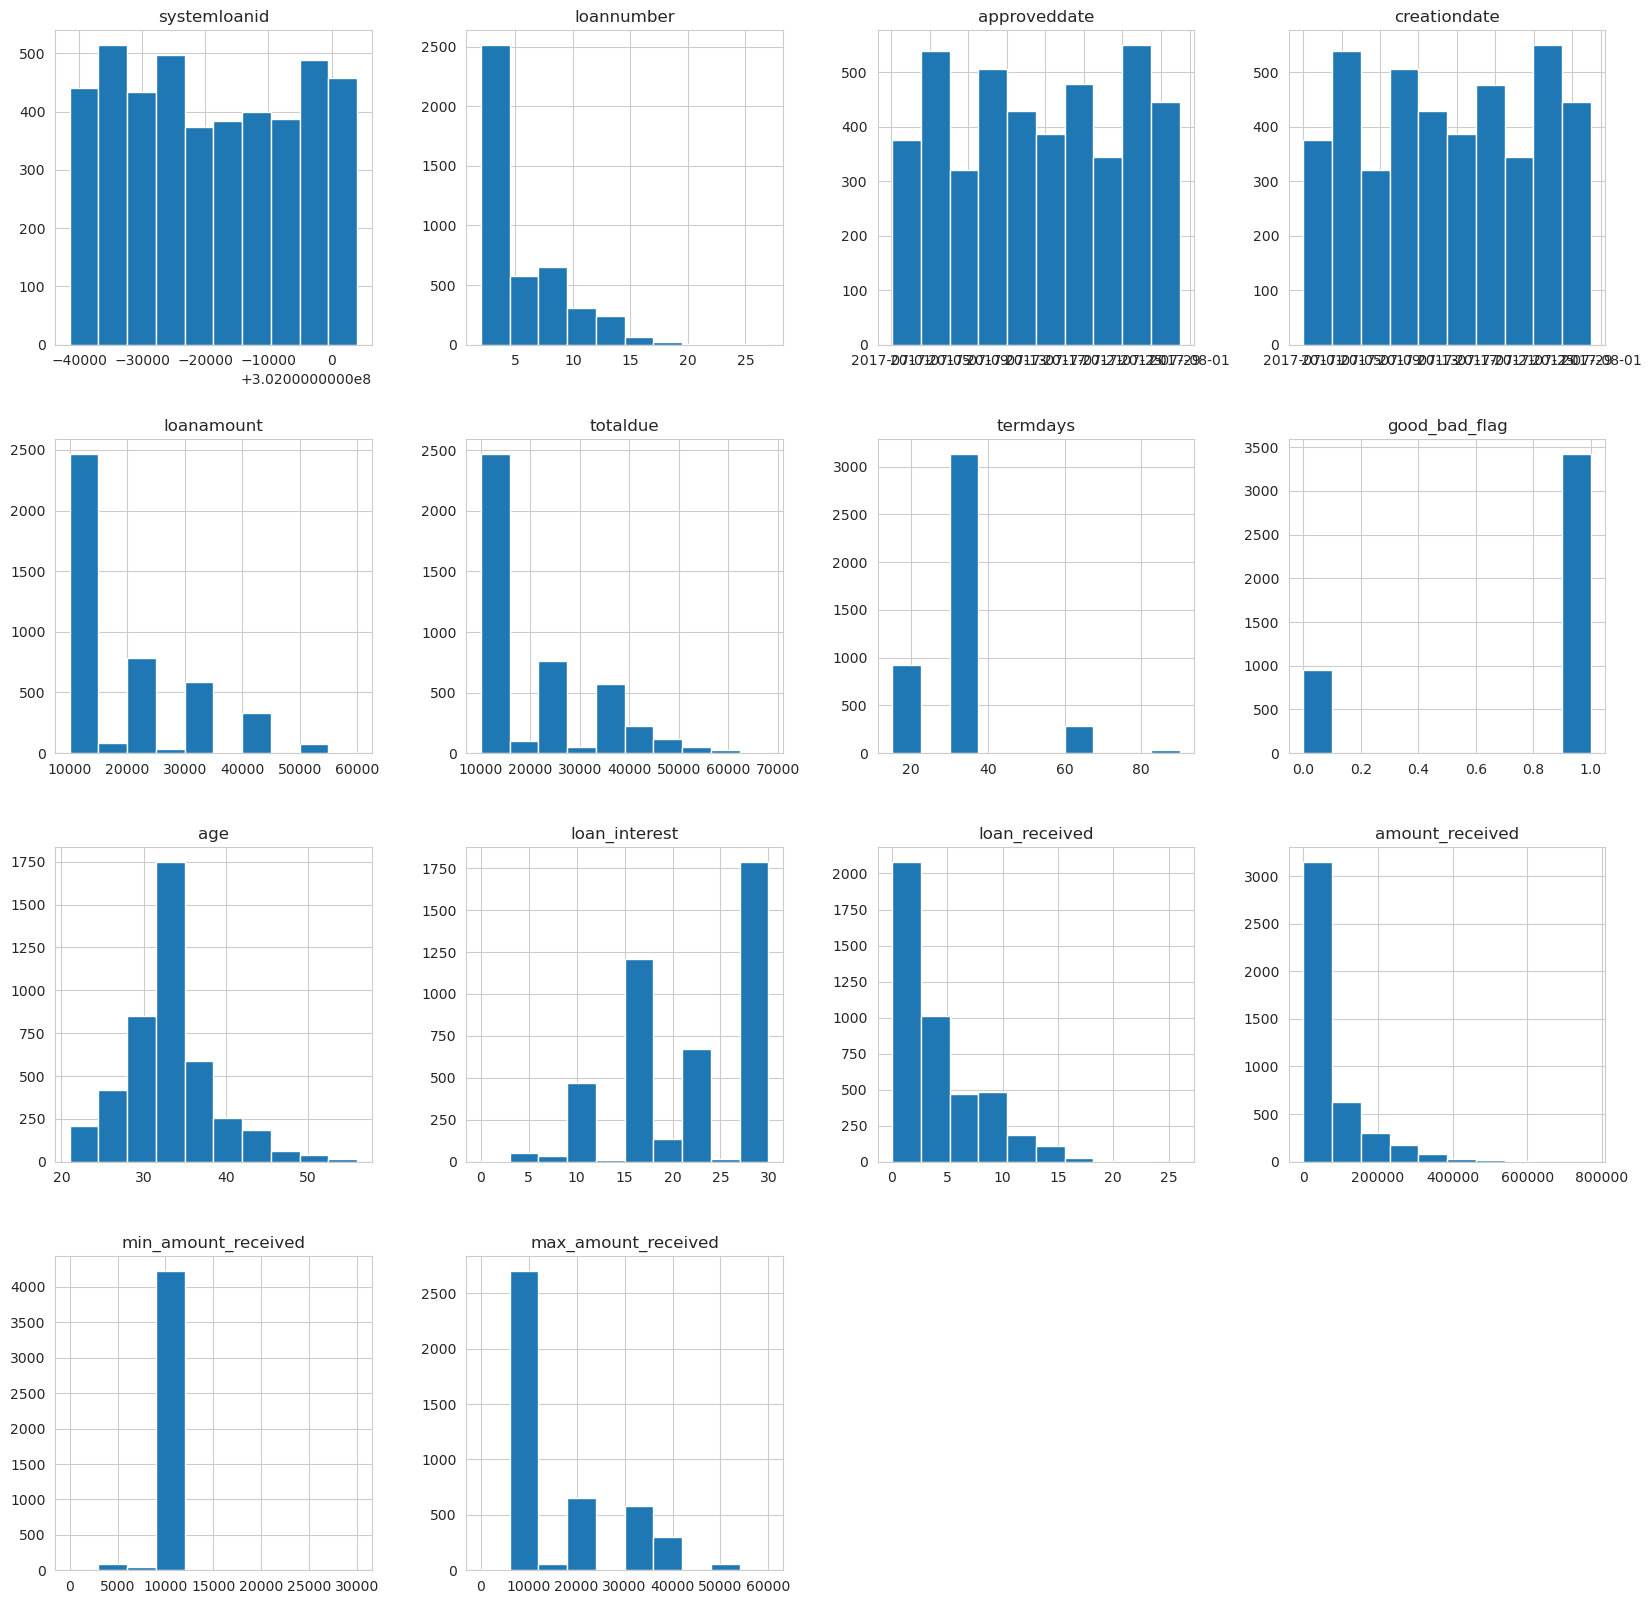

In [44]:
train_data.hist(figsize=(20, 20))

### Correlation

<AxesSubplot:>

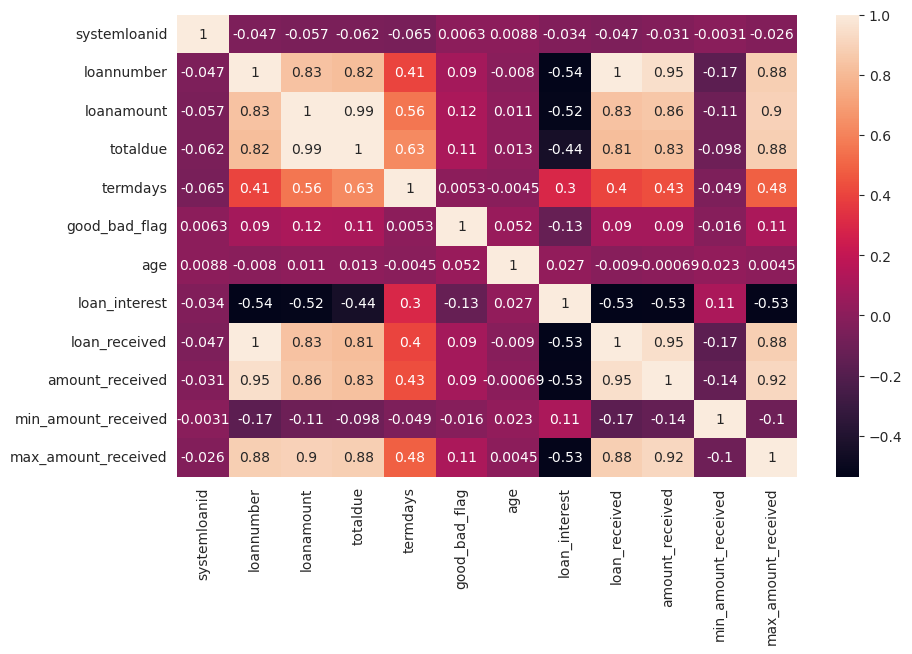

In [45]:
plt.figure(figsize=(10,6))
sns.heatmap(train_data.corr(), annot=True)

### visualisation

<AxesSubplot:xlabel='employment_status_clients', ylabel='count'>

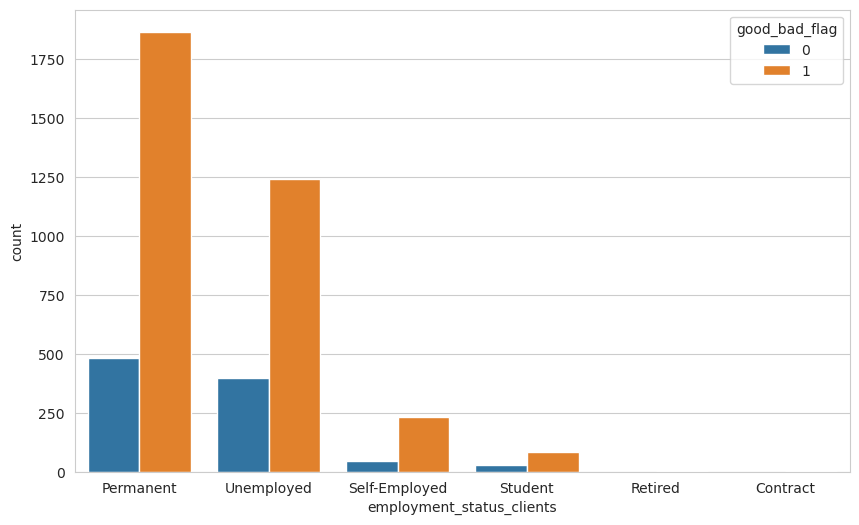

In [46]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(data=train_data, hue= 'good_bad_flag', x="employment_status_clients")

<AxesSubplot:xlabel='level_of_education_clients', ylabel='count'>

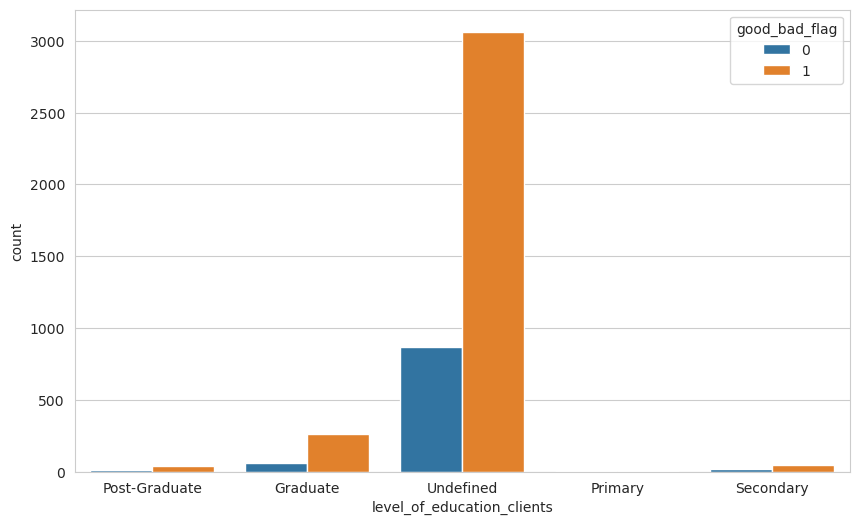

In [47]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(data=train_data, hue= 'good_bad_flag', x="level_of_education_clients")

<AxesSubplot:xlabel='loanamount', ylabel='count'>

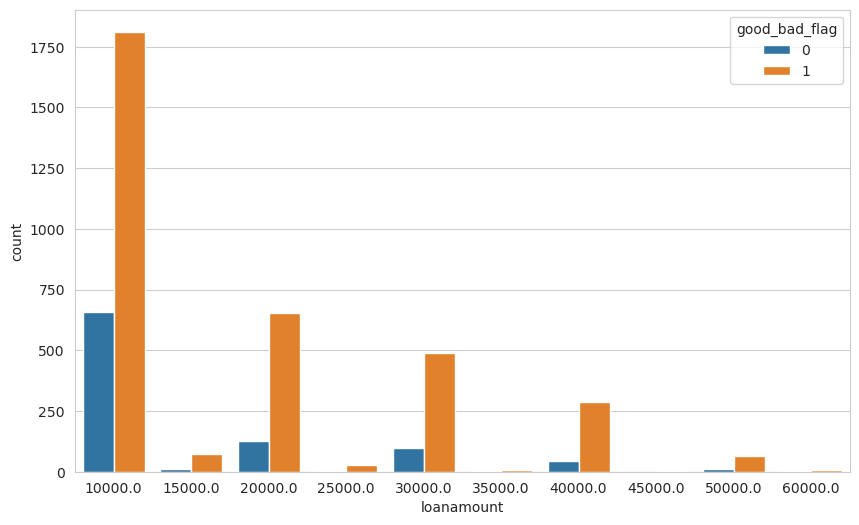

In [48]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(data=train_data, hue= 'good_bad_flag', x="loanamount")

In [49]:
data_temp = pd.get_dummies(train_data[['employment_status_clients', 'level_of_education_clients']])
data_temp

,employment_status_clients_Contract,employment_status_clients_Permanent,employment_status_clients_Retired,employment_status_clients_Self-Employed,employment_status_clients_Student,employment_status_clients_Unemployed,level_of_education_clients_Graduate,level_of_education_clients_Post-Graduate,level_of_education_clients_Primary,level_of_education_clients_Secondary,level_of_education_clients_Undefined
0,0,1,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4371,0,0,0,0,0,1,0,0,0,0,1
4372,0,1,0,0,0,0,0,0,0,0,1
4373,0,1,0,0,0,0,0,0,0,0,1
4374,0,1,0,0,0,0,0,0,0,0,1


In [50]:
train_data = train_data.join(data_temp)
train_data

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,age,...,employment_status_clients_Permanent,employment_status_clients_Retired,employment_status_clients_Self-Employed,employment_status_clients_Student,employment_status_clients_Unemployed,level_of_education_clients_Graduate,level_of_education_clients_Post-Graduate,level_of_education_clients_Primary,level_of_education_clients_Secondary,level_of_education_clients_Undefined
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,1,45.000000,...,1,0,0,0,0,0,1,0,0,0
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,1,32.000000,...,1,0,0,0,0,1,0,0,0,0
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,1,33.000000,...,1,0,0,0,0,0,0,0,0,1
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,1,40.000000,...,1,0,0,0,0,0,0,0,0,1
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,1,31.000000,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4371,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30 09:19:42,2017-07-30 08:18:30,10000.0,13000.0,30,0,32.916692,...,0,0,0,0,1,0,0,0,0,1
4372,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27 15:35:47,2017-07-27 14:35:40,10000.0,13000.0,30,0,28.000000,...,1,0,0,0,0,0,0,0,0,1
4373,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25 16:25:57,2017-07-25 15:24:47,10000.0,11500.0,15,0,28.000000,...,1,0,0,0,0,0,0,0,0,1
4374,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14 13:50:27,2017-07-14 12:50:21,10000.0,13000.0,30,0,27.000000,...,1,0,0,0,0,0,0,0,0,1


In [51]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4376 entries, 0 to 4375
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   customerid                                4376 non-null   object        
 1   systemloanid                              4376 non-null   int64         
 2   loannumber                                4376 non-null   int64         
 3   approveddate                              4376 non-null   datetime64[ns]
 4   creationdate                              4376 non-null   datetime64[ns]
 5   loanamount                                4376 non-null   float64       
 6   totaldue                                  4376 non-null   float64       
 7   termdays                                  4376 non-null   int64         
 8   good_bad_flag                             4376 non-null   int64         
 9   age                           

In [52]:
customerid = train_data["customerid"]
customerid

0       8a2a81a74ce8c05d014cfb32a0da1049
1       8a85886e54beabf90154c0a29ae757c0
2       8a8588f35438fe12015444567666018e
3       8a85890754145ace015429211b513e16
4       8a858970548359cc0154883481981866
                      ...               
4371    8a858e6d58b0cc520158beeb14b22a5a
4372    8a858ee85cf400f5015cf44ab1c42d5c
4373    8a858f365b2547f3015b284597147c94
4374    8a858f935ca09667015ca0ee3bc63f51
4375    8a858fd458639fcc015868eb14b542ad
Name: customerid, Length: 4376, dtype: object

In [53]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4376 entries, 0 to 4375
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   customerid                                4376 non-null   object        
 1   systemloanid                              4376 non-null   int64         
 2   loannumber                                4376 non-null   int64         
 3   approveddate                              4376 non-null   datetime64[ns]
 4   creationdate                              4376 non-null   datetime64[ns]
 5   loanamount                                4376 non-null   float64       
 6   totaldue                                  4376 non-null   float64       
 7   termdays                                  4376 non-null   int64         
 8   good_bad_flag                             4376 non-null   int64         
 9   age                           

In [54]:
train_data.drop(['customerid', 'systemloanid', 'approveddate', 'creationdate', 'employment_status_clients', 'level_of_education_clients'], axis=1, inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4376 entries, 0 to 4375
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   loannumber                                4376 non-null   int64  
 1   loanamount                                4376 non-null   float64
 2   totaldue                                  4376 non-null   float64
 3   termdays                                  4376 non-null   int64  
 4   good_bad_flag                             4376 non-null   int64  
 5   age                                       4376 non-null   float64
 6   loan_interest                             4376 non-null   float64
 7   loan_received                             4376 non-null   float64
 8   amount_received                           4376 non-null   float64
 9   min_amount_received                       4376 non-null   float64
 10  max_amount_received                 

# Model training

In [55]:
#train_data = train_perf
X = train_data.drop('good_bad_flag', axis=1)
y = train_data['good_bad_flag']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
del X_test["employment_status_clients_Contract"]
del X_train["employment_status_clients_Contract"]

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


#rcf = RandomForestClassifier()
#rcf = LogisticRegression(max_iter=500)
#rcf = LogisticRegression(max_iter = 1000, solver = 'lbfgs', class_weight = 'balanced' )
rcf = KNeighborsClassifier(n_neighbors=100)
#rcf = DecisionTreeClassifier()
#rcf = GaussianNB()
#rcf = SVC()
#rcf = MLPClassifier(max_iter=1000)
#rcf = RandomForestClassifier(n_estimators=1000, max_features='sqrt', criterion='entropy', bootstrap=True)
#rcf =  XGBClassifier(max_depth=10, subsample=1, n_estimators=1500, learning_rate=0.025, 
#                    min_child_weight=1, booster='gbtree', reg_alpha=0, reg_lambda=1)
#rcf = CatBoostClassifier(random_seed = 10, n_estimators = 1000)
rcf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=100)

In [78]:
y_pred = rcf.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       291
           1       0.78      1.00      0.88      1022

    accuracy                           0.78      1313
   macro avg       0.39      0.50      0.44      1313
weighted avg       0.61      0.78      0.68      1313



/home/ndimbiarisoa/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ndimbiarisoa/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ndimbiarisoa/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Test

In [80]:
test_perf = pd.read_csv("./testdata.csv")
test_perf

,customerid,loannumber,loanamount,totaldue,termdays,age,loan_interest,loan_received,amount_received,min_amount_received,...,employment_status_clients_Permanent,employment_status_clients_Retired,employment_status_clients_Self-Employed,employment_status_clients_Student,employment_status_clients_Unemployed,level_of_education_clients_Graduate,level_of_education_clients_Post-Graduate,level_of_education_clients_Primary,level_of_education_clients_Secondary,level_of_education_clients_Undefined
0,8a28afc7474813a40147639ec637156b,11,25000,27500.0,30,32.618182,10.0,10.0,178000.0,8000.0,...,0,0,0,0,1,0,0,0,0,1
1,8a3735d5518aba7301518ac34413010d,7,20000,24500.0,30,32.618182,22.5,6.0,70000.0,10000.0,...,0,0,0,0,1,0,0,0,0,1
2,8a76e7d443e6e97c0143ed099d102b1d,6,20000,24500.0,30,32.618182,22.5,2.0,20000.0,10000.0,...,0,0,0,0,1,0,0,0,0,1
3,8a818823525dceef01525deda2480384,10,40000,48000.0,60,32.618182,20.0,9.0,170000.0,5000.0,...,0,0,0,0,1,0,0,0,0,1
4,8a818926522ea5ef01523aff15c37482,3,20000,24500.0,30,32.618182,22.5,2.0,20000.0,10000.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,8a858fff5a36fe68015a3744f0021e89,6,20000,24500.0,30,32.618182,22.5,5.0,65000.0,10000.0,...,0,0,0,0,1,0,0,0,0,1
1446,8aaae7a74400b28201441c8b62514150,4,10000,13000.0,30,32.618182,30.0,3.0,30000.0,10000.0,...,0,0,0,0,1,0,0,0,0,1
1447,8aab10f748cf78ff0148d11fac1447a6,2,10000,13000.0,30,41.000000,30.0,1.0,10000.0,10000.0,...,1,0,0,0,0,0,0,1,0,0
1448,8aab160f499477da014999ba2f0f578b,4,20000,23000.0,30,32.618182,15.0,3.0,30000.0,10000.0,...,0,0,0,0,1,0,0,0,0,1


In [81]:
test_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   customerid                                1450 non-null   object 
 1   loannumber                                1450 non-null   int64  
 2   loanamount                                1450 non-null   int64  
 3   totaldue                                  1450 non-null   float64
 4   termdays                                  1450 non-null   int64  
 5   age                                       1450 non-null   float64
 6   loan_interest                             1450 non-null   float64
 7   loan_received                             1450 non-null   float64
 8   amount_received                           1450 non-null   float64
 9   min_amount_received                       1450 non-null   float64
 10  max_amount_received                 

In [82]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1313 entries, 4296 to 2880
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   loannumber                                1313 non-null   int64  
 1   loanamount                                1313 non-null   float64
 2   totaldue                                  1313 non-null   float64
 3   termdays                                  1313 non-null   int64  
 4   age                                       1313 non-null   float64
 5   loan_interest                             1313 non-null   float64
 6   loan_received                             1313 non-null   float64
 7   amount_received                           1313 non-null   float64
 8   min_amount_received                       1313 non-null   float64
 9   max_amount_received                       1313 non-null   float64
 10  employment_status_clients_Permane

In [83]:
customer_id = test_perf['customerid']
del test_perf['customerid']
#del test_perf['Unnamed: 0']
customer_id

0       8a28afc7474813a40147639ec637156b
1       8a3735d5518aba7301518ac34413010d
2       8a76e7d443e6e97c0143ed099d102b1d
3       8a818823525dceef01525deda2480384
4       8a818926522ea5ef01523aff15c37482
                      ...               
1445    8a858fff5a36fe68015a3744f0021e89
1446    8aaae7a74400b28201441c8b62514150
1447    8aab10f748cf78ff0148d11fac1447a6
1448    8aab160f499477da014999ba2f0f578b
1449    8addcb0645aff34b0145b25fe1616ee0
Name: customerid, Length: 1450, dtype: object

In [84]:
predict = rcf.predict(test_perf)
print(len(predict))
predict

1450


array([1, 1, 1, ..., 1, 1, 1])

In [85]:
prediction = pd.DataFrame(customer_id)
prediction['bad_good_flag'] = predict
prediction

,customerid,bad_good_flag
0,8a28afc7474813a40147639ec637156b,1
1,8a3735d5518aba7301518ac34413010d,1
2,8a76e7d443e6e97c0143ed099d102b1d,1
3,8a818823525dceef01525deda2480384,1
4,8a818926522ea5ef01523aff15c37482,1
...,...,...
1445,8a858fff5a36fe68015a3744f0021e89,1
1446,8aaae7a74400b28201441c8b62514150,1
1447,8aab10f748cf78ff0148d11fac1447a6,1
1448,8aab160f499477da014999ba2f0f578b,1


In [86]:
prediction.to_csv("submission.csv", index=False)